# Import Stuff

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.linalg import hankel

import time

from embedding import create_embedding
from svd import find_eig

from projection import project_onto_signal_subspace
from projection2 import project_onto_signal_subspace_part2

from threshold import find_threshold
from threshold2 import find_threshold_part3

from plot import plot_stuff

# Lists for doing stuff

In [59]:
HTime = np.zeros(4)
HTime_cnt = 0

# Scenario DA1

In [60]:
X = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[0], header=None))

In [61]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26289]
 [0.26723]
 ...
 [0.237  ]
 [0.23558]
 [0.23411]]
(4801, 1)
[0.32367] [0.23411]


In [62]:
X_train = X[:2000]
X_test = X[1750:]


In [63]:
print(X_train.shape, X_test.shape)

(2000, 1) (3051, 1)


In [64]:
X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

In [65]:
X_train_new, L = create_embedding(X_train_initial)

In [66]:
eigenValues, eigenVectors = find_eig(X_train_new)

### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

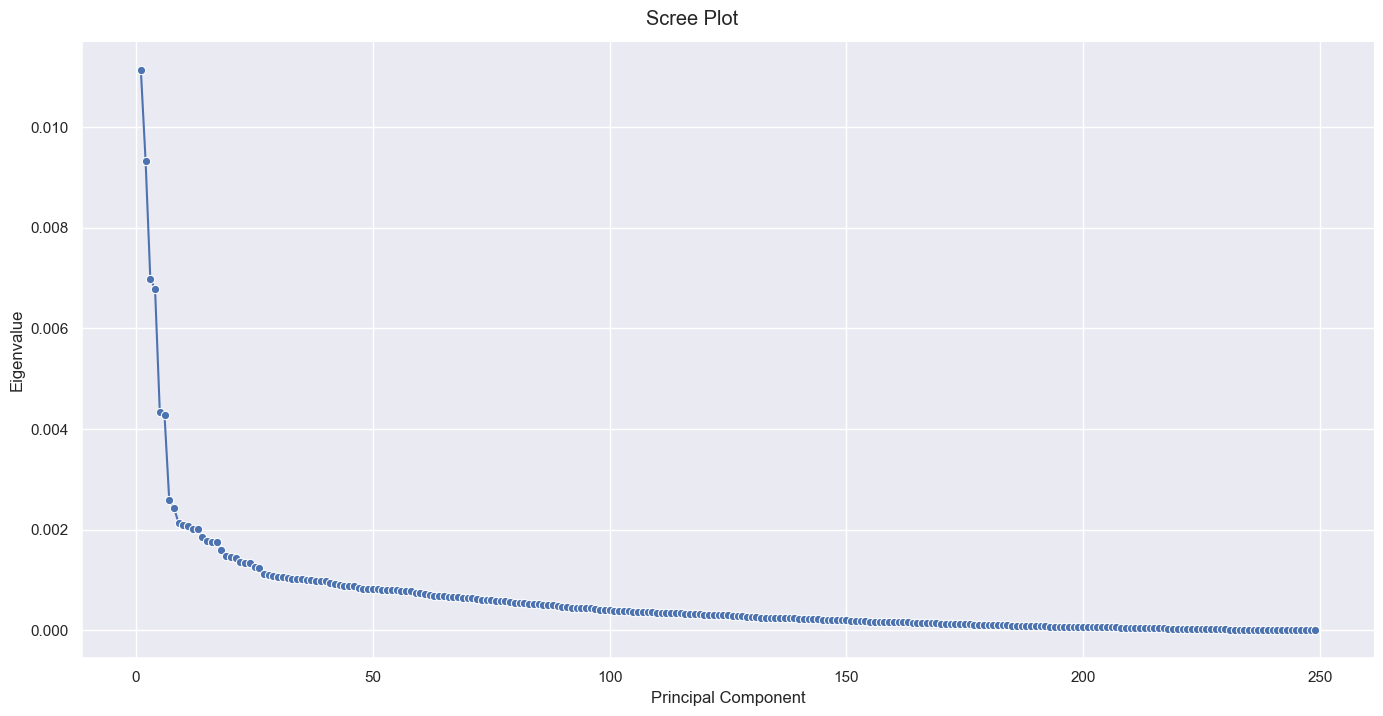

In [67]:
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [68]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 4
The value of r: 5


In [69]:
r = elbow_index + 1

## Euclidean distance with Mean

In [70]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

In [71]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [72]:
th1 = dtest_theta
print(dtest_theta)

0.041317665754424214


In [73]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count = np.zeros(5)
alarm_count[0] = np.sum(dj_scores > th1)
np.max(dj_scores)

np.float64(0.498054528856156)

##  Mahalanobis distance with Mean

In [74]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)

In [75]:
th1 = dtest_theta
print(dtest_theta)

8.96817325100238


In [76]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count3 = np.zeros(5)
alarm_count3[0] = np.sum(dj_scores > th1)
np.max(dj_scores)


np.float64(94.50222196463814)

## Euclidean distance with Centroid

In [77]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

In [78]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)

In [79]:
th1 = dtest_theta
print(dtest_theta)

0.039599853552163014


In [80]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2 = np.zeros(5)
alarm_count2[0] = np.sum(dj_scores > th1)
np.max(dj_scores)


np.float64(0.4966889855998944)

##  Mahalanobis distance with Centroid

In [81]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)

In [82]:
th1 = dtest_theta
print(dtest_theta)

8.372313113103585


In [83]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)  
dj_matrix = centroid - pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count4 = np.zeros(5)
alarm_count4[0] = np.sum(dj_scores > th1)
np.max(dj_scores)

np.float64(94.0004181694759)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


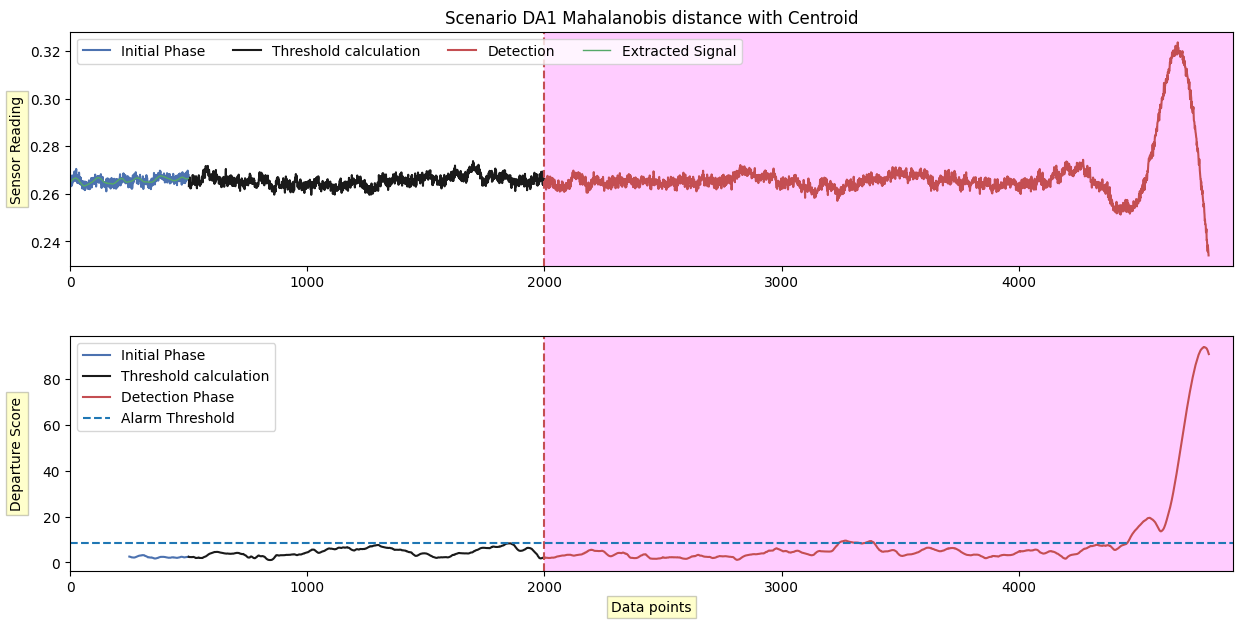

In [84]:
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA1 Mahalanobis distance with Centroid")

# Scenario DA2

In [85]:
X = np.asarray(pd.read_csv('../Dataset/TE/2-Scenario DA2/xmeas7_zero_data_1.csv', usecols=[0], header=None))

In [86]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26581]
 [0.26398]
 ...
 [0.20627]
 [0.20554]
 [0.20368]]
(4801, 1)
[0.27389] [0.16744]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

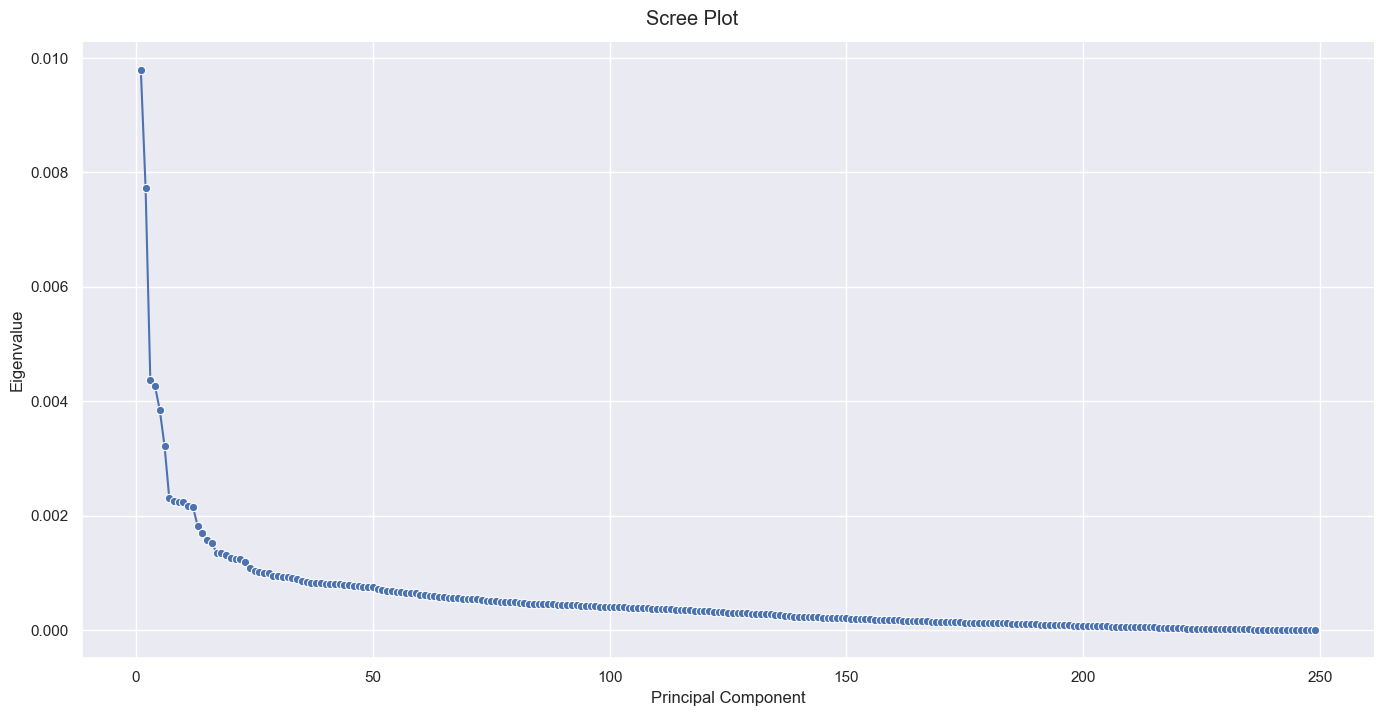

In [87]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [88]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


## Euclidean distance with Mean

In [89]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[1] = np.sum(dj_scores > th2)
np.max(dj_scores)



0.06242263896977938


np.float64(1.4323270535325492)

##  Mahalanobis distance with Mean

16.691783655916485
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


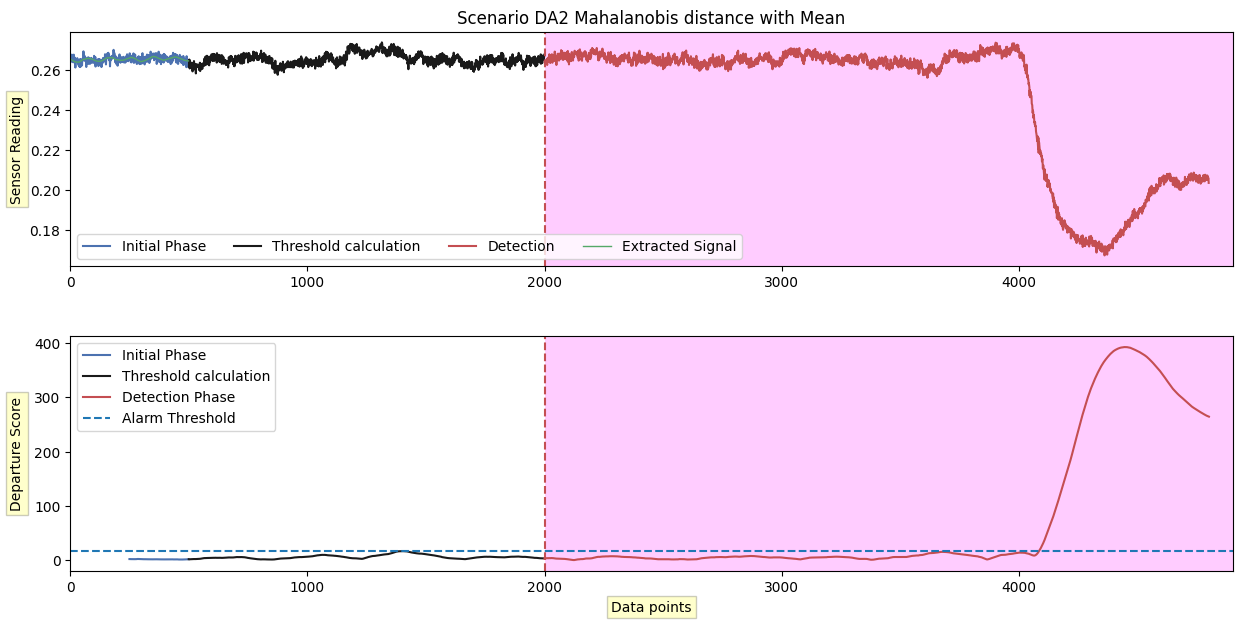

In [90]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count3[1] = np.sum(dj_scores > th2)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA2 Mahalanobis distance with Mean")

## Euclidean distance with Centroid

In [91]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[1] = np.sum(dj_scores > th2)
np.max(dj_scores)


0.06303576276628997


np.float64(1.4316778460059627)

##  Mahalanobis distance with Centroid

16.87375571421205
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


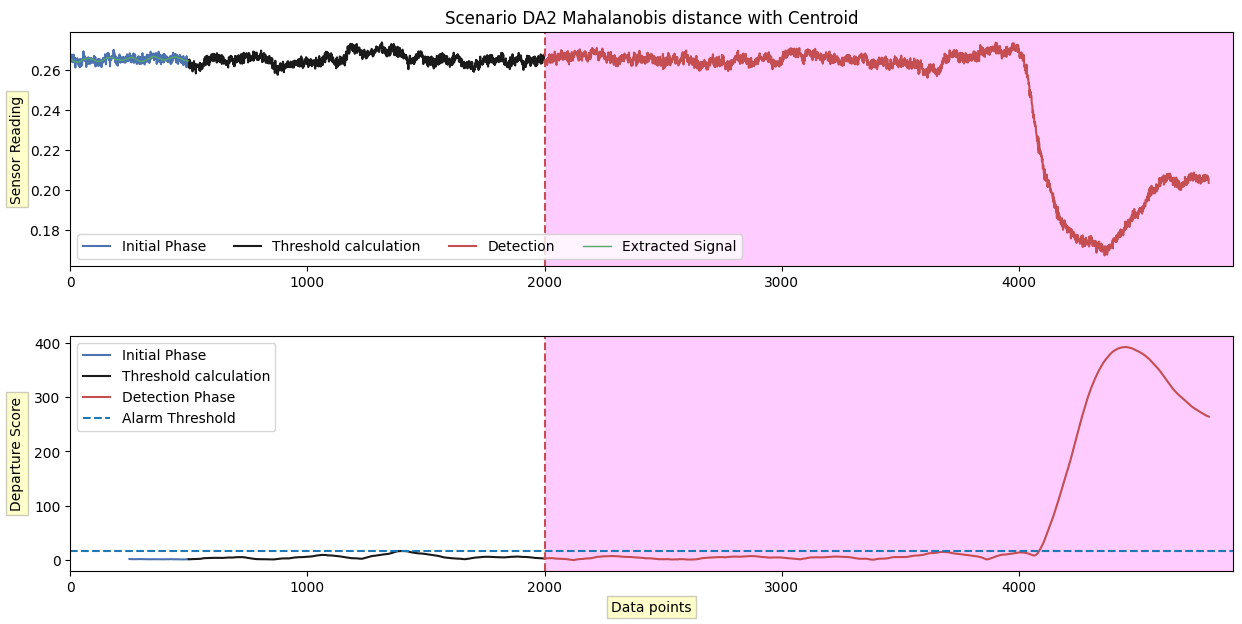

In [92]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count4[1] = np.sum(dj_scores > th2)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario DA2 Mahalanobis distance with Centroid")

# Scenario SA1

In [93]:
X = np.asarray(pd.read_csv('../Dataset/TE/3-Scenario SA1/xmv9_hundred_data_1.csv', usecols=[0], header=None))

In [94]:
print(X)
print(X.shape)
print(max(X), min(X))

[[0.26534]
 [0.26433]
 [0.26234]
 ...
 [0.25584]
 [0.25701]
 [0.2549 ]]
(4801, 1)
[0.28186] [0.25015]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

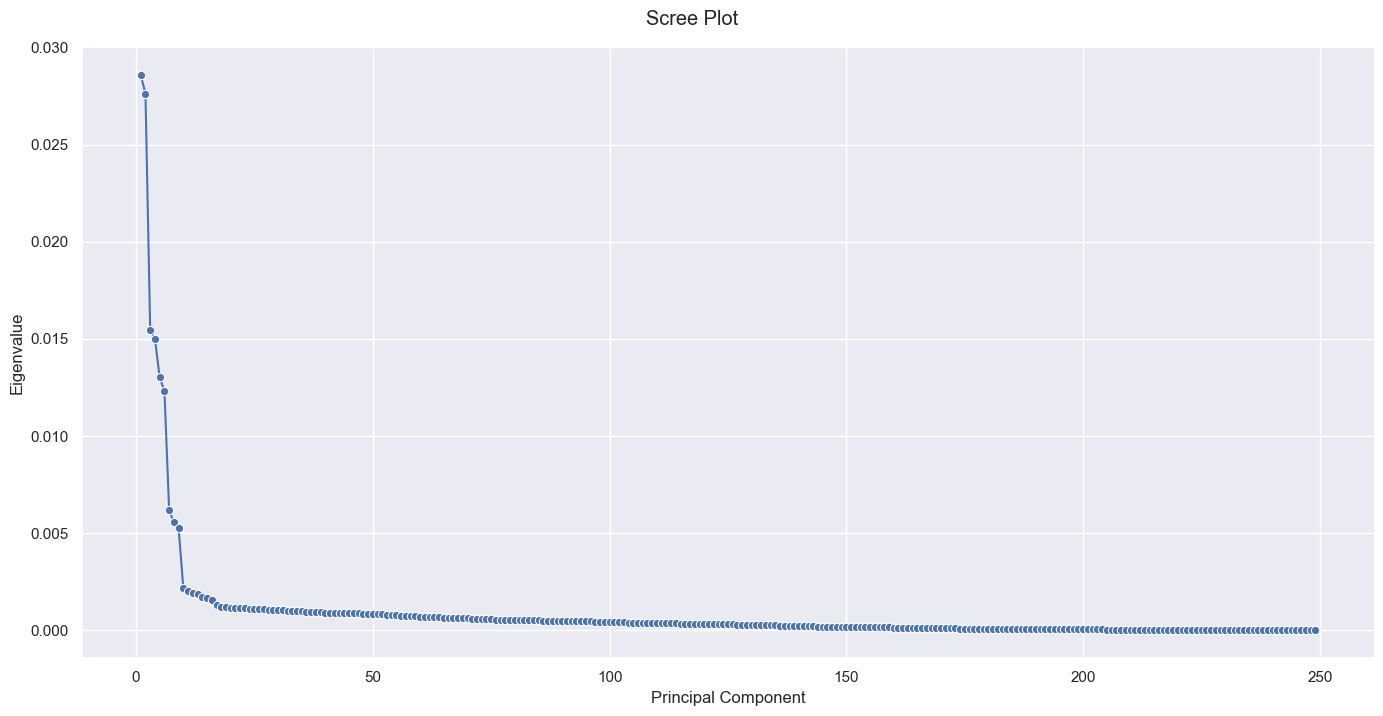

In [95]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [96]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


## Euclidean distance with Mean

In [97]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th3 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[2] = np.sum(dj_scores > th3)
np.max(dj_scores)



0.04684351083012187


np.float64(0.16621518390418522)

## Mahalanobis distance with Mean

In [98]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count3[2] = np.sum(dj_scores > th2)
np.max(dj_scores)

6.189273533276541


np.float64(21.524326915699188)

## Euclidean distance with Centroid

In [99]:
# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th3 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[2] = np.sum(dj_scores > th3)
np.max(dj_scores)



0.04446379678255899


np.float64(0.1637989831200354)

## Mahalanobis distance with Centroid

5.886317806308507
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


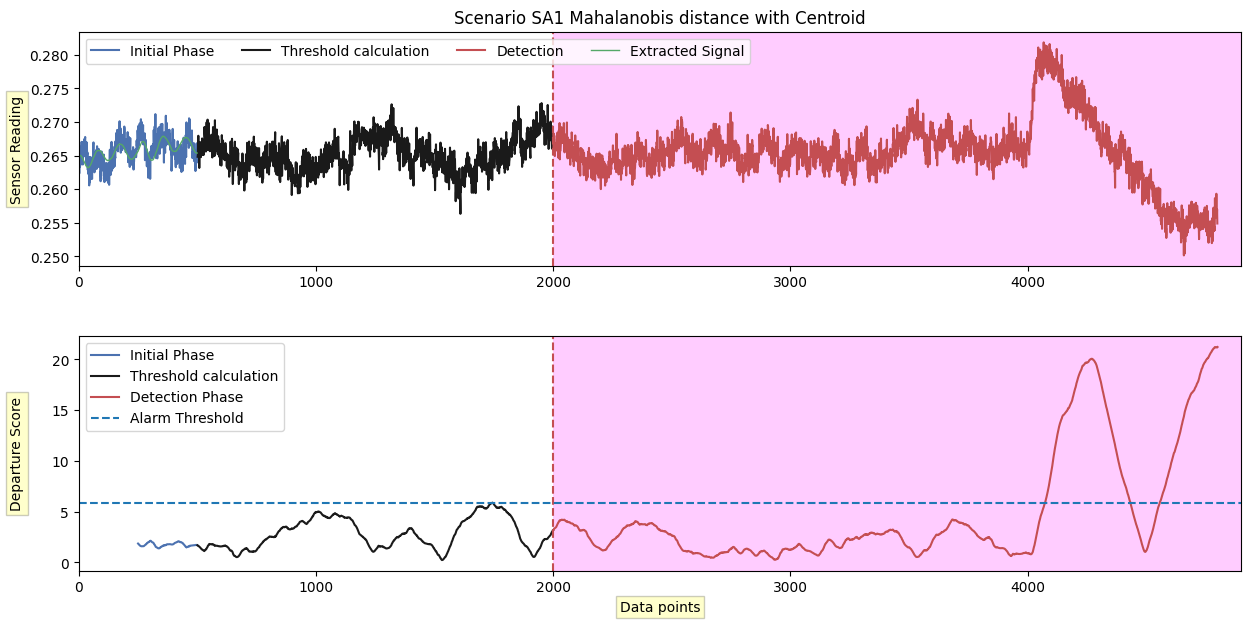

In [100]:
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count4[2] = np.sum(dj_scores > th2)
np.max(dj_scores)
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA1 Mahalanobis distance with Centroid")

# Scenario SA2

In [101]:
X = np.asarray(pd.read_csv('../Dataset/TE/4-Scenario SA2/xmv6_twentyeight_data_1.csv', usecols=[0], header=None))

In [102]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[0.26534]
 [0.26446]
 [0.26721]
 ...
 [0.27098]
 [0.27159]
 [0.26984]]
Shape of X: (4801, 1)
Maximum value: [0.28035], Minimum value: [0.25671]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

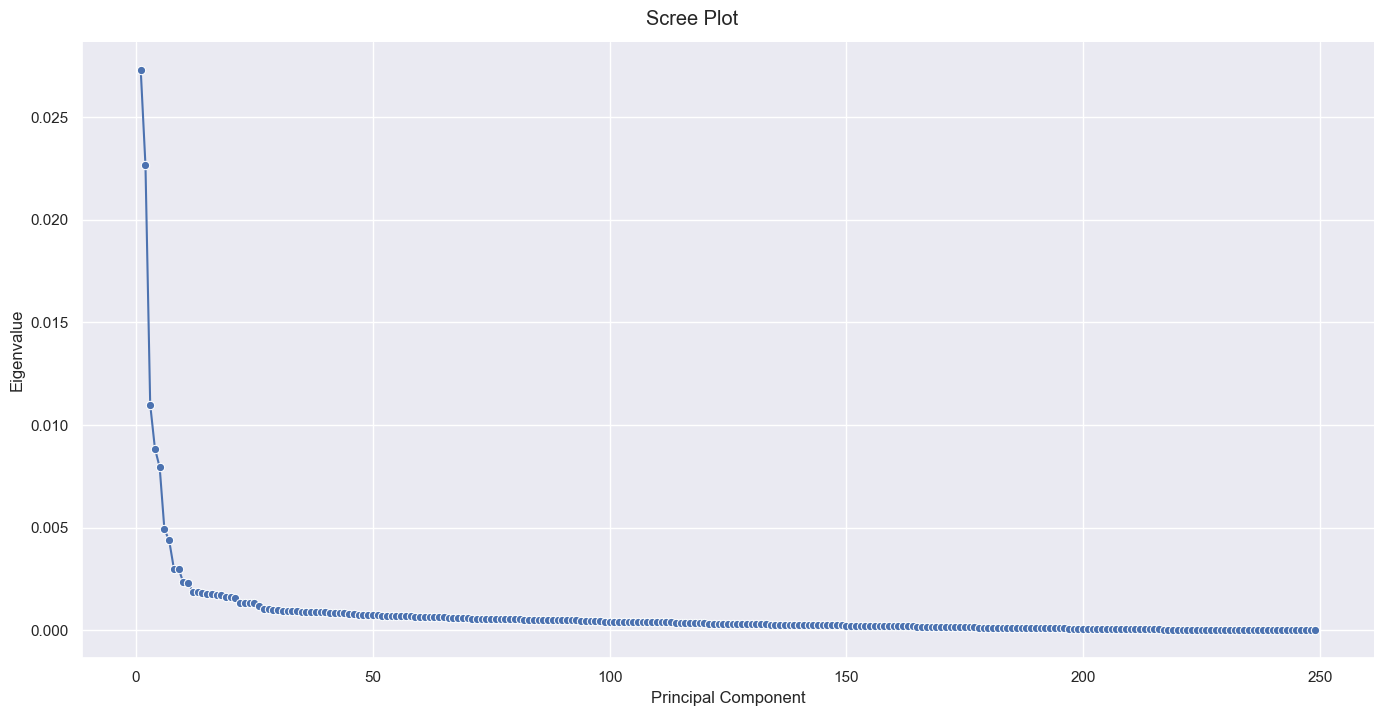

In [103]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [104]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 2
The value of r: 3


## Euclidean distance and Mahalanobis distance with Mean

In [105]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th4 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count[3] = np.sum(dj_scores > th4)
np.max(dj_scores)

dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count3[3] = np.sum(dj_scores > th2)
np.max(dj_scores)

0.047040940181675615
23.210520963166275


np.float64(77.53639484162599)

## Euclidean distance and Mahalanobis distance with Centroid

0.04631292197734156
22.8030520645204
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


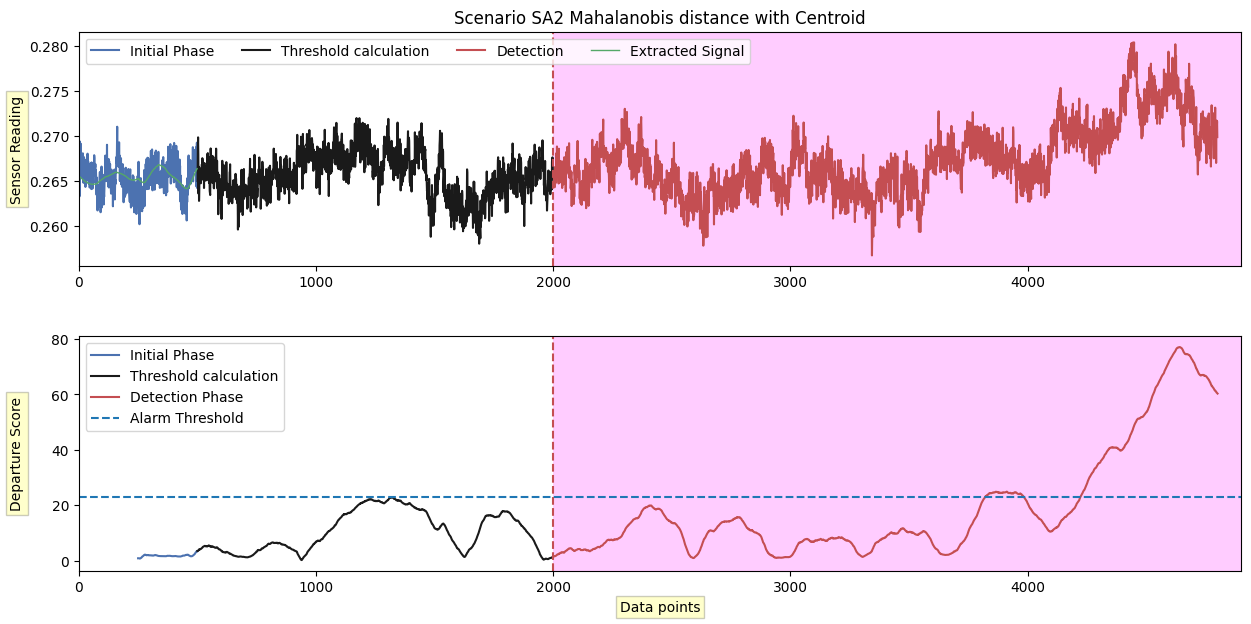

In [106]:
# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th4 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
alarm_count2[3] = np.sum(dj_scores > th4)
np.max(dj_scores)
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj
dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
alarm_count4[3] = np.sum(dj_scores > th2)
np.max(dj_scores)

plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA2 Mahalanobis distance with Centroid")

# Scenario SA3

In [107]:
X = np.asarray(pd.read_csv('../Dataset/TE/5-Scenario SA3/xmeas10_001_data_1.csv', usecols=[0], header=None))

In [108]:
print(X)
print(f"Shape of X: {X.shape}")
print(f"Maximum value: {max(X)}, Minimum value: {min(X)}")

[[0.26534]
 [0.26528]
 [0.26392]
 ...
 [0.23791]
 [0.23944]
 [0.23785]]
Shape of X: (4801, 1)
Maximum value: [0.354], Minimum value: [0.23733]


### Plot after removing the 1st EigenValue

Text(0.5, 1.02, 'Scree Plot')

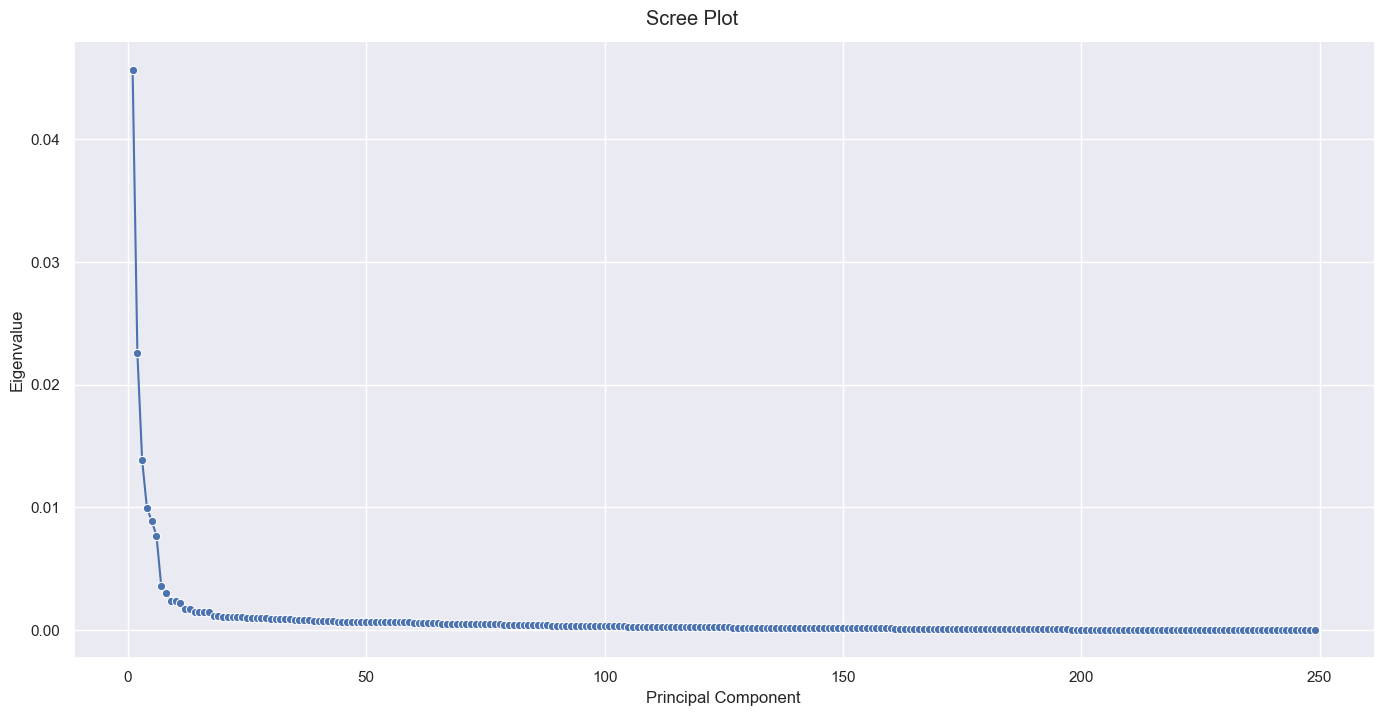

In [109]:
X_train = X[:2000]
X_test = X[1750:]

X_train_initial = X_train[:500]
X_train_theta = X_train[250:]

# Step 1
X_train_new, L = create_embedding(X_train_initial)

# Step 2
eigenValues, eigenVectors = find_eig(X_train_new)

# Scree Plot
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues)),
    'Eigenvalue': eigenValues[1:]
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=7, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

### Using our criteria of maximum consecutive difference

In [110]:
diff = np.diff(eigenValues[1:])

elbow_index = np.argmin(diff) + 1

print(f"The elbow is at component {elbow_index}")
print(f"The value of r: {elbow_index + 1}")

The elbow is at component 1
The value of r: 2


## Euclidean distance and Mahalanobis distance with Mean

In [111]:
r = elbow_index + 1

# Step 3
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train_new, eigenVectors, r)

# Step 4
start = time.time()
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th5 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix = centroid - pXj

dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
end = time.time()
HTime[HTime_cnt] = (end - start)*1000000000
HTime_cnt = HTime_cnt + 1

alarm_count[4] = np.sum(dj_scores > th5)
np.max(dj_scores)

start = time.time()
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj

dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
end = time.time()
HTime[HTime_cnt] = (end - start)*1000000000
HTime_cnt = HTime_cnt + 1

alarm_count3[4] = np.sum(dj_scores > th2)
np.max(dj_scores)

0.045315248036012674
12.184589960954938


np.float64(303.5901224451276)

## Euclidean distance and Mahalanobis distance with Centroid

0.042065450280429205
11.190193005559207
(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlables)
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


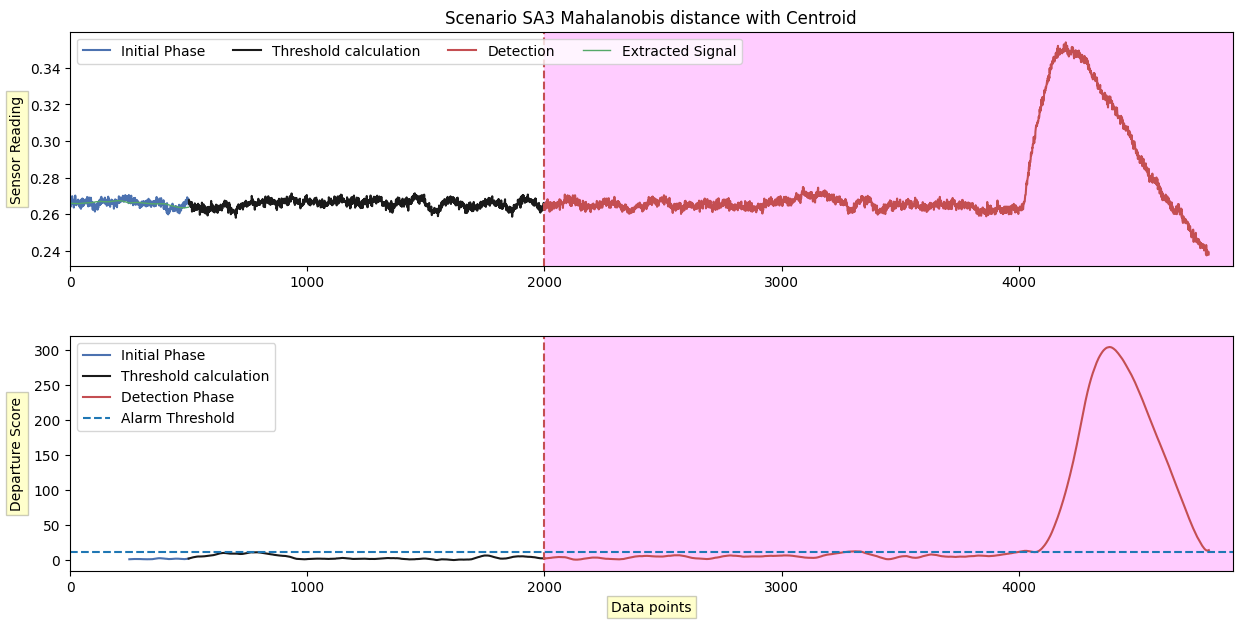

In [112]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace_part2(X_train_new, eigenVectors, r)

# Step 4
start = time.time()
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_initial, X_train_theta, U, centroid, L)
th5 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj

dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
end = time.time()
HTime[HTime_cnt] = (end - start)*1000000000
HTime_cnt = HTime_cnt + 1

alarm_count2[4] = np.sum(dj_scores > th5)
np.max(dj_scores)
start = time.time()
dtest_theta, dtrain_scores, dtest_scores, inv_cov_matrix = find_threshold_part3(X_train_initial, X_train_theta, U, centroid, L)
th2 = dtest_theta
print(dtest_theta)

Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul( UT, Xj)
dj_matrix =centroid- pXj

dj_scores = np.sqrt(np.einsum('ij,ij->j', np.dot(inv_cov_matrix, dj_matrix), dj_matrix))
dj_scores = np.asarray(dj_scores)
end = time.time()
HTime[HTime_cnt] = (end - start)*1000000000
HTime_cnt = HTime_cnt + 1

alarm_count4[4] = np.sum(dj_scores > th2)
np.max(dj_scores)
plot_stuff(1, X, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L, "Scenario SA3 Mahalanobis distance with Centroid")

# Runtime Analysis

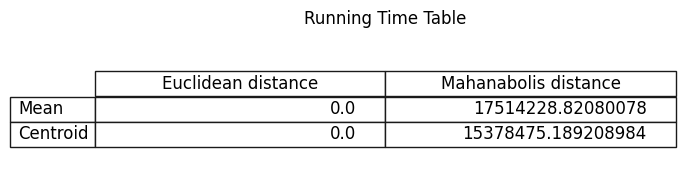

In [113]:
HTime_matrix = HTime.reshape(2,2)

fig, ax = plt.subplots(figsize=(5, 2))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

column_labels = ['Euclidean distance', 'Mahanabolis distance']
row_labels = ['Mean', 'Centroid']

table = ax.table(cellText=HTime_matrix, colLabels=column_labels, rowLabels=row_labels, loc='center')

table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title('Running Time Table')
plt.show()

## Alarm count Analysis

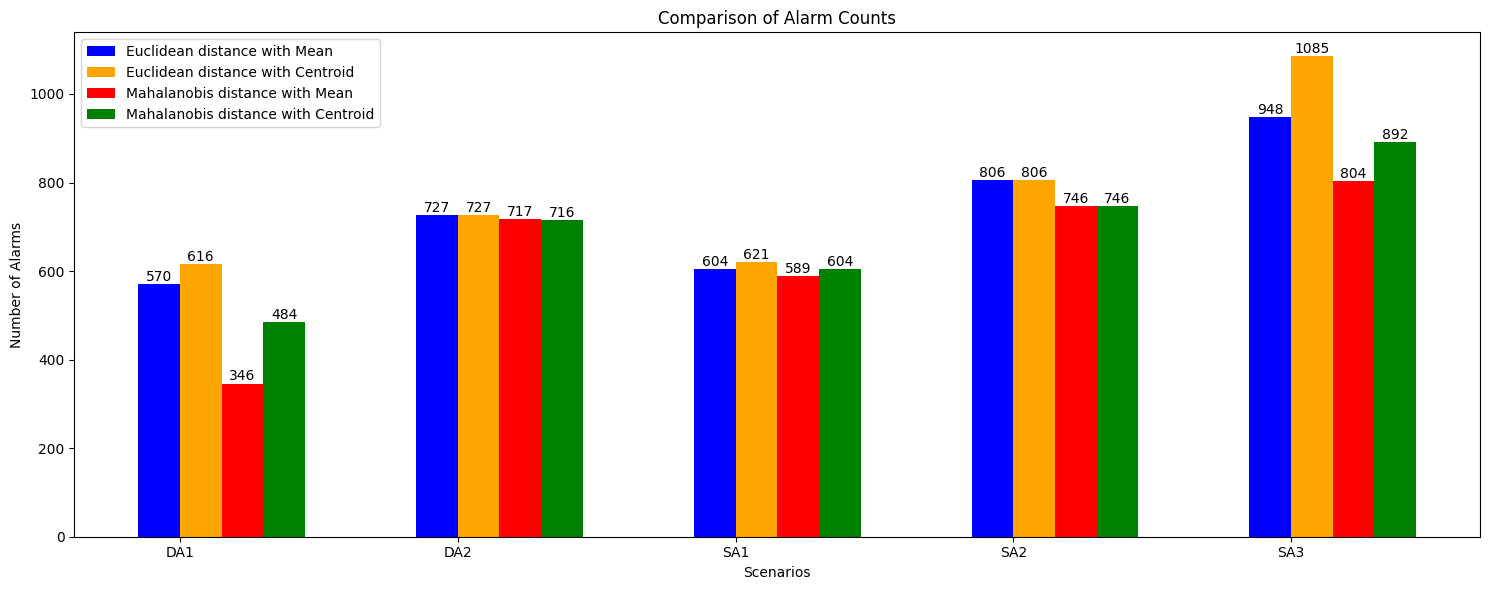

In [114]:
categories = ['DA1', 'DA2', 'SA1', 'SA2', 'SA3']

bar_width = 0.3

index = np.arange(len(categories))

plt.figure(figsize=(15, 6))
bars1 = plt.bar(index, alarm_count, bar_width/2, label='Euclidean distance with Mean', color='blue')
bars2 = plt.bar(index + bar_width/2, alarm_count2, bar_width/2, label='Euclidean distance with Centroid', color='orange')
bars3 = plt.bar(index+2*bar_width/2, alarm_count3, bar_width/2, label='Mahalanobis distance with Mean', color='red')
bars4 = plt.bar(index + 3*bar_width/2, alarm_count4, bar_width/2, label='Mahalanobis distance with Centroid', color='green')

plt.xlabel('Scenarios')
plt.ylabel('Number of Alarms')
plt.title('Comparison of Alarm Counts')
plt.xticks(index + bar_width / 4, categories)
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')
    
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()
